In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import math 
import astropy
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

In [3]:
##===========================================================SORTING==========================================================##

In [4]:
#Opening Excel Files with Data
DWARF_AGN_PAIR_HALFS_LW_raw = pd.read_excel('DWARF_AGN_LW_StelAgeData.xlsx')
DWARF_AGN_PAIR_HALFS_LW_df = pd.DataFrame(DWARF_AGN_PAIR_HALFS_LW_raw)
DWARF_AGN_PAIR_HALFS_LW = DWARF_AGN_PAIR_HALFS_LW_df.values.tolist()

d_AGN_PAIR_HALFS_LW = []

for i in range(len(DWARF_AGN_PAIR_HALFS_LW)):
    d_AGN_PAIR_HALFS_LW.append(DWARF_AGN_PAIR_HALFS_LW[i])

MASSIVE_AGN_PAIR_HALFS_LW_raw = pd.read_excel('MASSIVE_AGN_LW_StelAgeData.xlsx')
MASSIVE_AGN_PAIR_HALFS_LW_df = pd.DataFrame(MASSIVE_AGN_PAIR_HALFS_LW_raw)
MASSIVE_AGN_PAIR_HALFS_LW = MASSIVE_AGN_PAIR_HALFS_LW_df.values.tolist()

m_AGN_PAIR_HALFS_LW = []

for i in range(len(MASSIVE_AGN_PAIR_HALFS_LW)):
    m_AGN_PAIR_HALFS_LW.append(MASSIVE_AGN_PAIR_HALFS_LW[i])
    
print('Dwarf AGN LW Stellar Age Data (' + str(len(d_AGN_PAIR_HALFS_LW)) + '): ' + str(d_AGN_PAIR_HALFS_LW) + '\n')

print('Massive AGN LW Stellar Age Data(' + str(len(m_AGN_PAIR_HALFS_LW)) + '): ' + str(m_AGN_PAIR_HALFS_LW))

Dwarf AGN LW Stellar Age Data (469): [[0.8024409], [0.5249886], [0.8209693], [0.8163062], [0.6255627], [0.5575204], [0.6623071], [0.765241], [0.348397], [0.8080293], [0.278262], [0.6322604], [0.6812238], [0.7532955], [0.8335745], [0.746828], [0.7510576], [0.5447343], [0.3298428], [0.4949726], [0.5382989], [0.8157209], [0.3584934], [0.6051223], [0.859937], [0.6804689], [0.6552445], [0.7389354], [-0.2458027], [0.676919], [0.6786419], [0.7389662], [0.6588508], [0.6175773], [0.3550248], [0.09792595], [0.2683526], [0.2307784], [0.384423], [0.3942296], [0.4111929], [0.3358268], [0.4485857], [0.09916936], [0.3682727], [0.2039179], [0.5491583], [0.7527989], [0.4627216], [0.3402236], [0.2614152], [0.6993789], [0.2062095], [0.1551239], [0.2462861], [0.4182518], [0.5718472], [0.1687808], [0.2113322], [0.1994023], [0.2651165], [0.5265747], [0.7441041], [0.2848678], [0.372354], [0.59701], [0.4835876], [0.4458543], [0.2100016], [0.7626074], [0.3527738], [0.2833073], [0.05960545], [0.620245], [0.2004

In [12]:
dm_COMPLETE_PAIRS_LW = (d_AGN_PAIR_HALFS_LW, m_AGN_PAIR_HALFS_LW)
dm_COMPLETE_PAIRS_LW

([[0.8024409],
  [0.5249886],
  [0.8209693],
  [0.8163062],
  [0.6255627],
  [0.5575204],
  [0.6623071],
  [0.765241],
  [0.348397],
  [0.8080293],
  [0.278262],
  [0.6322604],
  [0.6812238],
  [0.7532955],
  [0.8335745],
  [0.746828],
  [0.7510576],
  [0.5447343],
  [0.3298428],
  [0.4949726],
  [0.5382989],
  [0.8157209],
  [0.3584934],
  [0.6051223],
  [0.859937],
  [0.6804689],
  [0.6552445],
  [0.7389354],
  [-0.2458027],
  [0.676919],
  [0.6786419],
  [0.7389662],
  [0.6588508],
  [0.6175773],
  [0.3550248],
  [0.09792595],
  [0.2683526],
  [0.2307784],
  [0.384423],
  [0.3942296],
  [0.4111929],
  [0.3358268],
  [0.4485857],
  [0.09916936],
  [0.3682727],
  [0.2039179],
  [0.5491583],
  [0.7527989],
  [0.4627216],
  [0.3402236],
  [0.2614152],
  [0.6993789],
  [0.2062095],
  [0.1551239],
  [0.2462861],
  [0.4182518],
  [0.5718472],
  [0.1687808],
  [0.2113322],
  [0.1994023],
  [0.2651165],
  [0.5265747],
  [0.7441041],
  [0.2848678],
  [0.372354],
  [0.59701],
  [0.4835876],
  

In [6]:
##===========================================================PLOTING==========================================================##

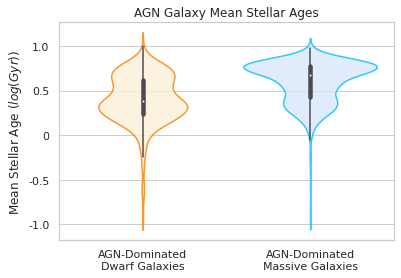

In [14]:
alphas = [0.8, 0.8]
facecolor = ['#FAEFD9','#D9E7FA']
edgecolors = ['#FB7D00','#02BEF7']

sns.set(style = 'whitegrid') 

vlnplt = sns.violinplot(data = dm_COMPLETE_PAIRS_LW)
plt.yticks([-1.0, -0.5, 0, 0.5, 1.0], ['-1.0', '-0.5','0', '0.5', '1.0'])

for violin, alpha in zip(vlnplt.collections[::2], alphas):
    violin.set_alpha(alpha)
    
for pc, color in zip(vlnplt.collections[::2], facecolor):
    pc.set_facecolor(color)

for pc, color in zip(vlnplt.collections[::2], edgecolors):
    pc.set_edgecolor(color)
    
    
vlnplt.set_ylabel("Mean Stellar Age " + "$(log(Gyr))$")
vlnplt.set_title("AGN Galaxy Mean Stellar Ages")
vlnplt.set_xticklabels(['AGN-Dominated\nDwarf Galaxies', 'AGN-Dominated\nMassive Galaxies'])

plt.savefig('AGN Dwarf and Massive Galaxy Stellar Population Age', dpi = 600, bbox_inches = 'tight')

In [8]:
##=====================================================STATISTICAL ANALYSIS===================================================##

In [13]:
sps.ttest_ind(d_AGN_PAIR_HALFS_LW, m_AGN_PAIR_HALFS_LW)

Ttest_indResult(statistic=array([-15.01687632]), pvalue=array([3.6602527e-48]))